### from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [17]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [18]:
import umap
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
print(__doc__)

Automatically created module for IPython interactive environment


In [19]:
import glob, csv, sys, math
import numpy as np
from scipy.interpolate import interp1d
files=glob.glob('data/*.csv')
files=sorted(files)
print(files)
def listmean(listin):
    return sum(listin)/len(listin)
    

['data/4096edr01GAN.csv', 'data/4096edr01raw.csv', 'data/4096lina11GAN.csv', 'data/4096lina11raw.csv', 'data/c035[NF=50Hz]0-32_4kGAN.csv', 'data/c035[NF=50Hz]0-32_4kraw.csv', 'data/pvnGAN.csv', 'data/pvnraw.csv']


In [20]:
import numpy as np
#some outout from Qub doesn't use 0 1 IDL convention!
def convertIDL(idl:list) -> list:
    '''This only works assuming more than 0.5 between states!'''
    idl=np.asarray(idl)
    mini=np.min(np.round(idl))
    idl=idl-mini
    maxi=np.max(np.round(idl))
    return np.round((idl/maxi)).tolist()

def shape(lister:list)->tuple:
    return np.asarray(lister).shape


In [21]:
#THIS VERSION MUST HAVE IDEALISED BUT MAY NOT HAVE TIME ie 2 or 3 columns
seq=512
def dofile(newfile):
    print("\n\n\n",newfile)
    i=0
    j=0
    firstline=True
    x=[]
    y=[]
    newx=[]
    newy=[]
    with open(newfile) as infile:
        correctidl=False
        reader = csv.reader(infile)
        
        for row in reader:
            columns=len(row)
            i += 1
            if firstline==True:
                # Don't read first line in case header exists
                firstline=False
                continue
            else:
                # Add current and channels to respective lists
                if columns>2:
                    #Must have time, so x is row [1]
                    try:
                        newx.append(float(row[1]))    
                    except:
                        print("An exception occurred",print(row[1]))
                        break
                else:
                    #So presumably no time column, x is row[0]
                    try:
                        newx.append(float(row[0]))    
                    except:
                        print("An exception occurred",print(row[0]))
                        break                        
                if columns>2:
                    #there is a time column so idl is in column 2
                    newy.append(float(row[2]))
                else:
                    #There is no time column so idl is col 1.
                    newy.append(float(row[1]))
            if i % 1000 == 0:
                # Progress update every 100 iterations
                print(f'Progress row: {i}', end='\r')
                sys.stdout.flush()
                print
        x.extend(newx)
        y.extend(newy)
        if max(y)>1:
            y=convertIDL(y)
               
        #make sure y is zero or 1
        miny=min(y)
        maxy=max(y)
        print(f'For x; min={min(x):.2f}, max={max(x):.2f}, mean = {listmean(x):.2f} '+ 
              f'and y;  min={min(y)}, max={max(y)}, xshape={shape(x)}, yshape{shape(y)}')            
        return x,y
    
jumps=seq
def makeImages2c(lx, ly, seq, num, j):
    z = np.ones((2,seq))
    z[0, 0:seq] = lx[j: j+seq]
    z[1, 0:seq] = ly[j: j+seq]
    return z
    
x,y,iclass = [],[],[]
images=[]
for count, filename in enumerate(files):
    newx,newy=dofile(filename)
    print('\nnewx len = \n',np.asarray(newx).shape)
    x.extend(newx)
    y.extend(newy)
    classes=count+1
    print('x shape, y shape',np.asarray(x).shape,np.asarray(y).shape)    
    print('Converting to images...')
    '''Now draw the labels and data out'''
    num=len(newx)
    newimages=[makeImages2c(newx, newy, seq, num, j) for j in range(0, num-seq, jumps)]
    images.extend(newimages)
    print(f"{count} images.shape",np.asarray(newimages).shape)
    iclass.append(np.asarray(newimages).shape[0])

images=np.asarray(images).tolist()
print("FInAL images.shape",np.asarray(images).shape)        
print(f'shape of x {np.asarray(x).shape}')
print(f'shape of y {np.asarray(y).shape}')
num=len(x)
print(f'there are {classes} classes')
print(f"iclass={iclass}")




 data/4096edr01GAN.csv
For x; min=-5.62, max=19.40, mean = 1.56 and y;  min=0.0, max=1.0, xshape=(490895,), yshape(490895,)

newx len = 
 (490895,)
x shape, y shape (490895,) (490895,)
Converting to images...
0 images.shape (958, 2, 512)



 data/4096edr01raw.csv
For x; min=-4.65, max=14.52, mean = 0.89 and y;  min=0.0, max=1.0, xshape=(1000444,), yshape(1000444,)

newx len = 
 (1000444,)
x shape, y shape (1491339,) (1491339,)
Converting to images...
1 images.shape (1953, 2, 512)



 data/4096lina11GAN.csv
For x; min=-2.07, max=25.47, mean = 10.88 and y;  min=0.0, max=1.0, xshape=(409599,), yshape(409599,)

newx len = 
 (409599,)
x shape, y shape (1900938,) (1900938,)
Converting to images...
2 images.shape (799, 2, 512)



 data/4096lina11raw.csv
For x; min=-0.63, max=0.47, mean = -0.09 and y;  min=0.0, max=1.0, xshape=(150751,), yshape(150751,)

newx len = 
 (150751,)
x shape, y shape (2051689,) (2051689,)
Converting to images...
3 images.shape (294, 2, 512)



 data/c035[NF=50Hz]0

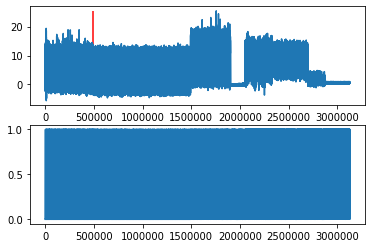

In [22]:
t=range(len(x))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.vlines(seq*iclass[0],0,max(x),"red")

plt.subplot(2,1,2)
plt.plot(t,y)
plt.vlines(seq*iclass[0],0,1,"red")

plt.show()

1.0
plot length = 10000, from 10240
plot length = 10000, from 500736


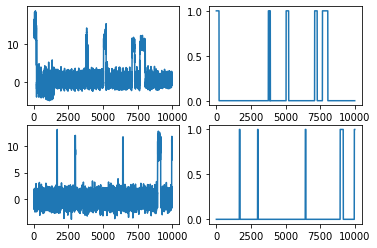

In [23]:
print(max(y))
rec=20
length=10000

start=rec*seq
end= start+length
print (f'plot length = {length}, from {start}')
t=range(length)
plt.subplot(2,2,1)
plt.plot(t,x[start:end])

plt.subplot(2,2,2)
plt.plot(t,y[start:end])

start=rec*seq+(iclass[0]*seq)
end= start+length
print (f'plot length = {length}, from {start}')

plt.subplot(2,2,3)
plt.plot(t,x[start:end])

plt.subplot(2,2,4)
plt.plot(t,y[start:end])

plt.show()

In [70]:
X,Y=[],[]

#Make the funky shape used in the embedding examples
for i, image in enumerate(images):
    a=image[0][:]
    b=image[1][:]
    ab=a+b
    #print(np.asarray(ab).shape)
    X.append(ab)
print(np.asarray(X).shape)  
#print(y)

(6099, 1024)


In [71]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0,verbose=1, 
                     perplexity=30, n_iter=1000, learning_rate=1000,n_iter_without_progress=1000)
t0 = time()
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)
#print(X_tsne[:,0])

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6099 samples in 0.277s...
[t-SNE] Computed neighbors for 6099 samples in 25.761s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6099
[t-SNE] Computed conditional probabilities for sample 2000 / 6099
[t-SNE] Computed conditional probabilities for sample 3000 / 6099
[t-SNE] Computed conditional probabilities for sample 4000 / 6099
[t-SNE] Computed conditional probabilities for sample 5000 / 6099
[t-SNE] Computed conditional probabilities for sample 6000 / 6099
[t-SNE] Computed conditional probabilities for sample 6099 / 6099
[t-SNE] Mean sigma: 1.760857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.941086
[t-SNE] KL divergence after 1000 iterations: 1.654127
(6099, 2)


In [72]:
# Import Python cycling library
from itertools import cycle
ncol=len(iclass)
colours=[]
sizes=[]
bs=50*ncol+50
colour_codes = map('C{}'.format, cycle(range(ncol)))
for i in range(ncol):
    color=next(colour_codes)
    color=[color]*iclass[i]
    size=[bs-i*50]*iclass[i]
    sizes.extend(size)
    colours.extend(color)
     
print(len(colours))


6099


In [73]:
# Import Python cycling library Do this again, a little differently!
from itertools import cycle
ncol=len(iclass)
colours=[]
sizes=[]
bs=20*len(iclass)+7.5
colour_codes = map('C{}'.format, cycle(range(len(iclass))))
for i in range(len(iclass)):
    colour=next(colour_codes)
    size=[bs-i*15.0]
    sizes.append(size)
    colours.append(colour)
print(sizes)     
print(len(colours))

[[167.5], [152.5], [137.5], [122.5], [107.5], [92.5], [77.5], [62.5]]
8


<Figure size 396x396 with 0 Axes>

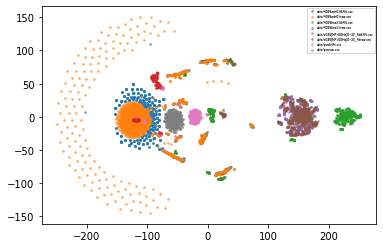

In [80]:
from matplotlib.pyplot import figure
import matplotlib.font_manager as font_manager

#Suddendly imac hanging when I execute this cell
# %matplotlib
#figure(figsize=(15, 10), dpi=72)
#plt.scatter(X_tsne[:,0],X_tsne[:,1],c=colours,s=sizes)
fig, ax = plt.subplots()
for n in range(len(iclass)):
    #print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    #or s=sizes[n]
    ax.scatter(X_tsne[start:end,0], X_tsne[start:end,1],c=colours[n],s=3,label=files[0],alpha=0.5)
    start=end
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=3)

ax.legend((files),framealpha=0.75, prop=font)

plt.savefig("latestTSNE.png", dpi=300)

In [75]:
fit = umap.UMAP()
%time X_umap = fit.fit_transform(X)

CPU times: user 38.9 s, sys: 214 ms, total: 39.1 s
Wall time: 4.96 s


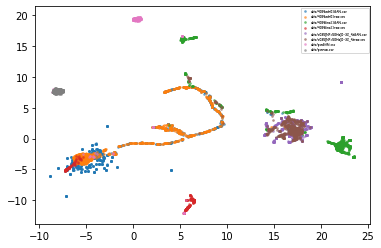

In [76]:
fig, ax = plt.subplots()
for n in range(len(iclass)):
    #print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    #or s=sizes[n]
    ax.scatter(X_umap[start:end,0], X_umap[start:end,1],c=colours[n],s=3,label=files[0],alpha=0.5)
    start=end
#only show legend when debugging...
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=3)

ax.legend((files),framealpha=0.75, prop=font)

plt.savefig("latestUMAP.png", dpi=300)

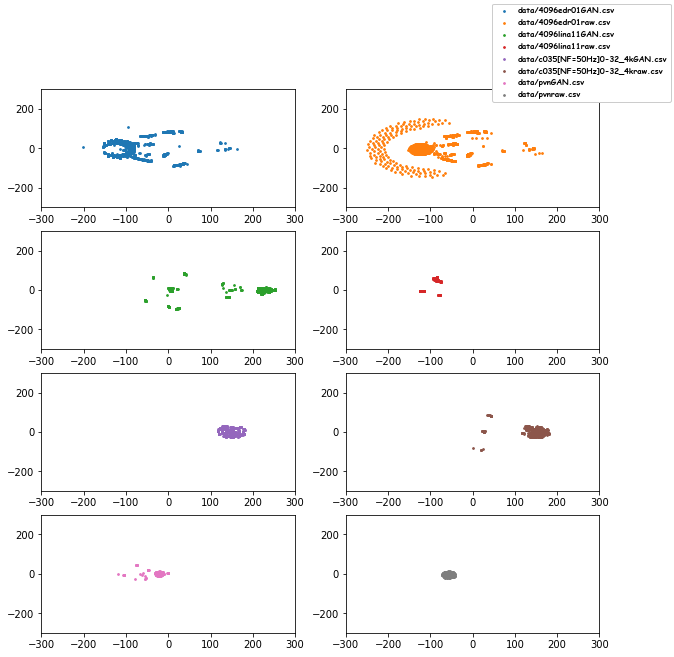

In [95]:
fig, ax = plt.subplots(4,2)
c=0-1
for n in range(len(iclass)):
    #print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    #sort the location of the plot
    if n%2==0:
        r=0
        c+=1
    else:
        r=1        
    #print(r,c)
    ax[c,r].scatter(X_tsne[start:end,0], X_tsne[start:end,1],c=colours[n],s=3,label=files[0],alpha=1)
    ax[c,r].set_xlim([-300, 300])
    ax[c,r].set_ylim([-300, 300])
    ax[c,r].figure.set_size_inches(10, 10)
    #or s=sizes[n]
    start=end
#only show legend when debugging...
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=8)

fig.legend((files),framealpha=1.0, prop=font)

plt.savefig("latestUMAPmulti.png", dpi=300)

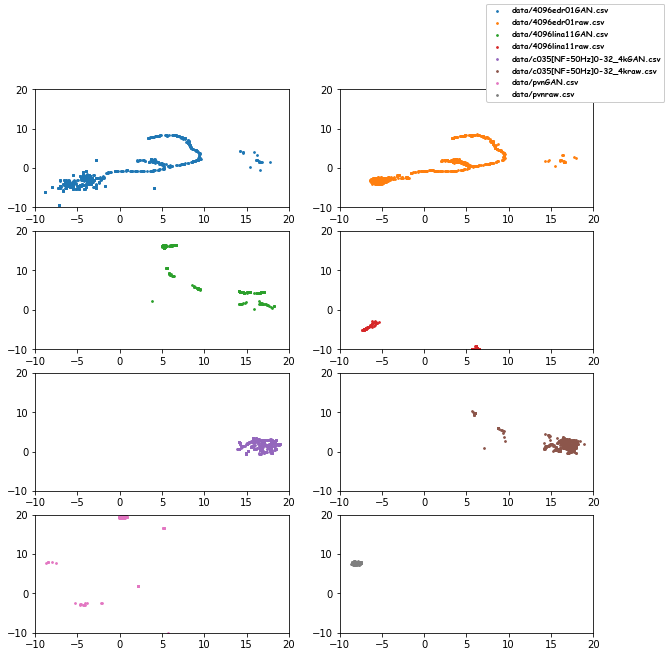

In [96]:
fig, ax = plt.subplots(4,2)
c=0-1
for n in range(len(iclass)):
    #print('class',n)  
    if n==0:
        start=0
    end=sum(iclass[:n+1])
    #sort the location of the plot
    if n%2==0:
        r=0
        c+=1
    else:
        r=1        
    #print(r,c)
    ax[c,r].scatter(X_umap[start:end,0], X_umap[start:end,1],c=colours[n],s=3,label=files[0],alpha=1)
    ax[c,r].set_xlim([-10, 20])
    ax[c,r].set_ylim([-10, 20])
    ax[c,r].figure.set_size_inches(10, 10)
    #or s=sizes[n]
    start=end
#only show legend when debugging...
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='bold',
                                   style='normal', size=8)

fig.legend((files),framealpha=1.0, prop=font)

plt.savefig("latestUMAPmulti.png", dpi=300)